In [1]:
import cellular_automata as ca
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
GENERATIONS = 200
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4
RHO = 3.85
taus = [0,5,10,15,20,25,30,35,40,45]

In [3]:
tau_histories = []
clusters = []

for tau in taus:
    history, Ms = ca.simulate_tumor_growth_with_clusters(tau, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    tau_histories.append(history)
    
    indiv_clusters = [ca.find_clusters(M, ROWS,COLS) for M in Ms]
    clusters.append([len(indiv_clusters[i]) for i in range(GENERATIONS)])

In [4]:
tau_histories = []
clusters = []

for tau in taus:
    history, Ms = ca.simulate_tumor_growth_with_clusters(tau, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    tau_histories.append(history)
    
    indiv_clusters = [ca.find_clusters(M, ROWS,COLS) for M in Ms]
    clusters.append([len(indiv_clusters[i]) for i in range(GENERATIONS)])

In [4]:
Nc_histories = [[history[g]['Nc'] for g in range(GENERATIONS)] for history in tau_histories]

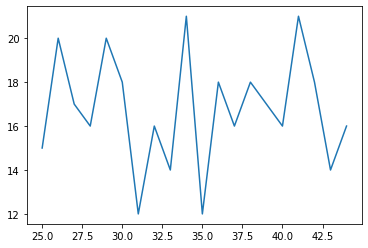

In [25]:
T_ms = []
for i in range(20):
    for generation in range(GENERATIONS):
        if Nc_histories[i][generation] > 49:
            T_ms.append(generation)
            break
            
plt.plot(taus,T_ms)

In [26]:
np.max(T_ms)

21

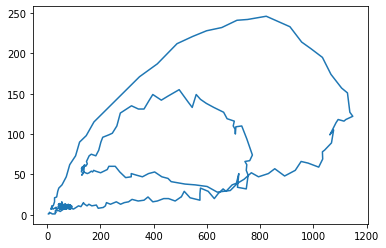

In [13]:
plt.plot(Nc_histories[5],clusters[5])


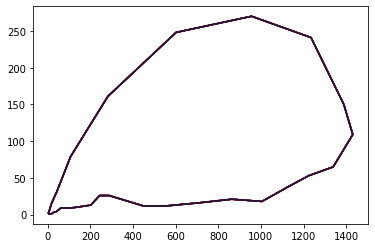

In [14]:
palette = sns.color_palette('rocket_r', len(taus))

for i,(history, cluster) in enumerate(zip(Nc_histories,clusters)):
    # slice_history = history[::5]
    # slice_cluster = cluster[::5]
    # if i < 5:
    plt.plot(slice_history,slice_cluster, color=palette[i])

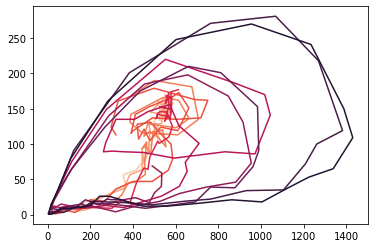

In [13]:
palette = sns.color_palette('rocket_r', len(taus))

for i,(history, cluster) in enumerate(zip(Nc_histories,clusters)):
    slice_history = history[::5]
    slice_cluster = cluster[::5]
    plt.plot(slice_history,slice_cluster, color=palette[i])

In [4]:
# history_no_delay, M__no_delay = simulate_tumor_growth(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

In [26]:
clusters_no_delay = [find_clusters(M, ROWS,COLS) for M in M__no_delay]
len(clusters_no_delay[400])

171

In [29]:
nr_clusters = [len(clusters_no_delay[i]) for i in range(GENERATIONS)]

In [32]:
Nc_without_delay = [history_no_delay[g]['Nc'] for g in range(GENERATIONS)]

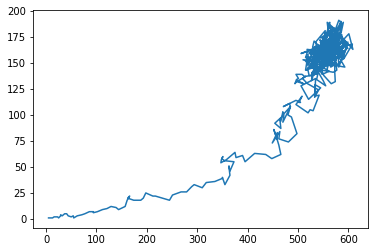

In [33]:
plt.plot(Nc_without_delay,nr_clusters)